# Sentiment Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import regex as re
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import random

import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Read csv file
df = pd.read_csv('compiled_tweets.csv')
df.head()

,Annotator1,Anonator2,Text,Subjectivity,Polarity,Subjectivity_Anonator2,Polarity_Anonator2
0,Jia Kai,Yiting,Hey Kingz Crew I Just Went Live On Twitch Come...,1.0,1.0,1.0,1.0
1,Jia Kai,Yiting,little bit of dbd into apex legends (: https:/...,0.0,NaN,0.0,0.0
2,Jia Kai,Yiting,Tuesday night apex?! Lets get some damage! htt...,1.0,1.0,1.0,1.0
3,Jia Kai,Yiting,Watch tohrmentgames GO CRAZY ON APEX!! FOLLOW ...,1.0,1.0,1.0,1.0
4,Jia Kai,Yiting,3...2...1.. 🔴LIVE!🔴\n👁️👄👁️\nHopping into some ...,0.0,NaN,1.0,0.0


# Subjectivity Classification

In [3]:
# Removing unused columns
df = df[["Text", "Subjectivity", "Polarity"]]
# df.head()
df = df[df['Subjectivity'].notna()]
df.head()
# df.count()

,Text,Subjectivity,Polarity
0,Hey Kingz Crew I Just Went Live On Twitch Come...,1.0,1.0
1,little bit of dbd into apex legends (: https:/...,0.0,NaN
2,Tuesday night apex?! Lets get some damage! htt...,1.0,1.0
3,Watch tohrmentgames GO CRAZY ON APEX!! FOLLOW ...,1.0,1.0
4,3...2...1.. 🔴LIVE!🔴\n👁️👄👁️\nHopping into some ...,0.0,NaN


# Preprocessing

In [4]:
def clean_text(text):
    text = str(text)
    text = re.sub(r'[^a-zA-Z ]+', ' ', text)
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'^RT[\s]+', '', text)
    # text = re.sub(r'pic.twitter\S+', ' ', text)
    text = re.sub(r'#', '', text)
    text = text.lower()

    return text

def decontracted(text):
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"it\'s", "it is", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\’m", " am", text)
    text = re.sub(r"\“", "", text)
    text = re.sub(r"\”", "", text)
    text = re.sub(r"\…", "", text)

    return text


def remove_punc(tweet):
    tweet =  tweet.translate(str.maketrans('', '', string.punctuation))
    tweet = ' '.join([word for word in tweet.split()])
    tweet = tweet.lower()
    
    return tweet

In [5]:
df['Text'] = df['Text'].apply(clean_text).apply(decontracted).apply(remove_punc)
df.head()

,Text,Subjectivity,Polarity
0,hey kingz crew i just went live on twitch come...,1.0,1.0
1,little bit of dbd into apex legends t co fihcg...,0.0,NaN
2,tuesday night apex lets get some damage t co d...,1.0,1.0
3,watch tohrmentgames go crazy on apex follow up...,1.0,1.0
4,live hopping into some apexlegends for a bit c...,0.0,NaN


# Stemming 

In [6]:
# nltk.download('punkt')
# nltk.download('stopwords')

def stem_text(x):
    stemmer = PorterStemmer()
    x = word_tokenize(x)
    stem = ''
    
    for i in x:
        stem += stemmer.stem(i) + ' '
        
    return stem

df['stemmed_text'] = df['Text'].apply(stem_text)
df.head()

,Text,Subjectivity,Polarity,stemmed_text
0,hey kingz crew i just went live on twitch come...,1.0,1.0,hey kingz crew i just went live on twitch come...
1,little bit of dbd into apex legends t co fihcg...,0.0,NaN,littl bit of dbd into apex legend t co fihcgni...
2,tuesday night apex lets get some damage t co d...,1.0,1.0,tuesday night apex let get some damag t co dbt...
3,watch tohrmentgames go crazy on apex follow up...,1.0,1.0,watch tohrmentgam go crazi on apex follow up c...
4,live hopping into some apexlegends for a bit c...,0.0,NaN,live hop into some apexlegend for a bit come o...


# Lemmatization

In [7]:
# nltk.download('wordnet')
# nltk.download('omw-1.4')

def lemmatize_text(corpus):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in tweet.split()]) for tweet in corpus]

df['lemmatized_text'] = lemmatize_text(df['Text'])
df.head()

,Text,Subjectivity,Polarity,stemmed_text,lemmatized_text
0,hey kingz crew i just went live on twitch come...,1.0,1.0,hey kingz crew i just went live on twitch come...,hey kingz crew i just went live on twitch come...
1,little bit of dbd into apex legends t co fihcg...,0.0,NaN,littl bit of dbd into apex legend t co fihcgni...,little bit of dbd into apex legend t co fihcgn...
2,tuesday night apex lets get some damage t co d...,1.0,1.0,tuesday night apex let get some damag t co dbt...,tuesday night apex let get some damage t co db...
3,watch tohrmentgames go crazy on apex follow up...,1.0,1.0,watch tohrmentgam go crazi on apex follow up c...,watch tohrmentgames go crazy on apex follow up...
4,live hopping into some apexlegends for a bit c...,0.0,NaN,live hop into some apexlegend for a bit come o...,live hopping into some apexlegends for a bit c...


# Stopwords removal

In [8]:
stop = stopwords.words('english')
additional_stopwords = ["'s","...","'ve","``","''","'m",'--',"'ll","'d"]
stop = set(stop + additional_stopwords)

def remove_stopwords(x):
    x = word_tokenize(x)
    store_words = ''
    
    for i in x:
        if i not in stop:
            store_words += i + ' '
            
    return store_words

In [9]:
df['cleaned_text'] = df['Text'].apply(remove_stopwords)
df['cleaned_stemmed_text'] = df['stemmed_text'].apply(remove_stopwords)
df['cleaned_lemmatized_text'] = df['lemmatized_text'].apply(remove_stopwords)
df.head()

,Text,Subjectivity,Polarity,stemmed_text,lemmatized_text,cleaned_text,cleaned_stemmed_text,cleaned_lemmatized_text
0,hey kingz crew i just went live on twitch come...,1.0,1.0,hey kingz crew i just went live on twitch come...,hey kingz crew i just went live on twitch come...,hey kingz crew went live twitch come chat hang...,hey kingz crew went live twitch come chat hang...,hey kingz crew went live twitch come chat hang...
1,little bit of dbd into apex legends t co fihcg...,0.0,NaN,littl bit of dbd into apex legend t co fihcgni...,little bit of dbd into apex legend t co fihcgn...,little bit dbd apex legends co fihcgnia,littl bit dbd apex legend co fihcgnia,little bit dbd apex legend co fihcgnia
2,tuesday night apex lets get some damage t co d...,1.0,1.0,tuesday night apex let get some damag t co dbt...,tuesday night apex let get some damage t co db...,tuesday night apex lets get damage co dbt givs...,tuesday night apex let get damag co dbt givsyr...,tuesday night apex let get damage co dbt givsy...
3,watch tohrmentgames go crazy on apex follow up...,1.0,1.0,watch tohrmentgam go crazi on apex follow up c...,watch tohrmentgames go crazy on apex follow up...,watch tohrmentgames go crazy apex follow carbo...,watch tohrmentgam go crazi apex follow carbong...,watch tohrmentgames go crazy apex follow carbo...
4,live hopping into some apexlegends for a bit c...,0.0,NaN,live hop into some apexlegend for a bit come o...,live hopping into some apexlegends for a bit c...,live hopping apexlegends bit come want witness...,live hop apexlegend bit come want wit decent g...,live hopping apexlegends bit come want witness...


# Word Count

In [10]:
wordcount = df['Text'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus.".format(wordcount))

wordcount = df['stemmed_text'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus after stemming.".format(wordcount))

wordcount = df['cleaned_stemmed_text'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus after stemming and removal of stopwords.".format(wordcount))

wordcount = df['lemmatized_text'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus after lemmatization.".format(wordcount))

wordcount = df['cleaned_lemmatized_text'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus after lemmatization and removal of stopwords.".format(wordcount))

wordcount = df['cleaned_text'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus after removal of stopwords.".format(wordcount))

There are 29381 words in the corpus.
There are 29409 words in the corpus after stemming.
There are 18859 words in the corpus after stemming and removal of stopwords.
There are 29381 words in the corpus after lemmatization.
There are 18407 words in the corpus after lemmatization and removal of stopwords.
There are 18225 words in the corpus after removal of stopwords.


In [11]:
df.Text.str.split(expand=True).stack().value_counts()

the               785
i                 739
to                603
x                 575
is                525
                 ... 
disappear           1
automatically       1
sight               1
japanese            1
thewalkingdead      1
Length: 4881, dtype: int64

# **Naive Bayes Classification**

In [19]:
def naiveBayesClassification(x_train, x_test, y_train, y_test, preprocessing):

    naiveBayes_model = MultinomialNB().fit(tweet_matrix, y_train)
    result = naiveBayes_model.predict(test_vector)
    confuse = metrics.confusion_matrix(y_test, result)
    
    
    # ==================================================
    # Confusion Matrix
    # ==================================================
    
    fig = plt.figure()
    sns.heatmap(confuse, annot = True, fmt='d')
    
    print("==================================================")
    print("Model: Naive Bayes Classification")
    print("Preprocessing Function: ", preprocessing)
    print("==================================================")
    print()
    plt.title("Confusion matrix of Naive Bayes Classification of Tweets")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    time.sleep(3)
    
    # ==================================================
    # Evaluation Metrics
    # ==================================================
    
    F1_score = metrics.f1_score(y_test, result)
    precision_score = metrics.precision_score(y_test, result)
    recall_score = metrics.recall_score(y_test, result)
    average_precision = metrics.average_precision_score(y_test, result)
    
    print("------------ Evaluation Metrics ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(F1_score))
    print('Precision score: {0:0.3f}'.format(precision_score))
    print('Recall score: {0:0.3f}'.format(recall_score))
    print('Average precision-recall score: {0:0.3f}'.format(average_precision))
    print()
    

    

# **K-Nearest Neighbour (KNN) Classification**

In [20]:
def KNNClassification(x_train, x_test, y_train, y_test, preprocessing):
    
    metric = ['euclidean', 'manhattan', 'cosine']
    neighbors = list(range(1,30))
    leaf_size = list(range(1,50))
    weight = ['uniform', 'distance']
    param_grid = {'metric' : metric, 'n_neighbors': neighbors, 'weights' : weight, 'leaf_size' : leaf_size}
    
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
    grid_search.fit(test_vector, y_test)
    grid_search.best_params_
    
    
    knn_model = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], metric= grid_search.best_params_['metric'], leaf_size = grid_search.best_params_['leaf_size'], weights = grid_search.best_params_['weights'])
    knn_model.fit(tweet_matrix, y_train)   
    
    result = knn_model.predict(test_vector)
    confuse = metrics.confusion_matrix(y_test, result)
    
    # ==================================================
    # Confusion Matrix
    # ==================================================
    
    fig = plt.figure()
    sns.heatmap(confuse, annot = True, fmt='d')
    
    print("==================================================")
    print("Model: K-Nearest Neighbour Classification")
    print("Best parameters:", grid_search.best_params_)
    print("Preprocessing Function: ", preprocessing)
    print("==================================================")
    print()
    plt.title("Confusion matrix of KNN Classification of tweets")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    
    # ==================================================
    # Evaluation Metrics
    # ==================================================
    
    F1_score = metrics.f1_score(y_test, result)
    precision_score= metrics.precision_score(y_test, result)
    recall_score = metrics.recall_score(y_test, result)
    average_precision = metrics.average_precision_score(y_test, result)

    print("------------ Evaluation Metrics ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(F1_score))
    print('Precision score: {0:0.3f}'.format(precision_score))
    print('Recall score: {0:0.3f}'.format(recall_score))
    print('Average precision-recall score: {0:0.3f}'.format(average_precision))
    print()
  

# **Support Vector Machine (SVM) Classification**

In [21]:
def SVMClassification(x_train, x_test, y_train, y_test, preprocessing):

    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.05, 0.1, 0.15, 0.20, 0.25]
    degrees = [0, 1, 2, 3, 4, 5, 6]
    kernels = ['rbf', 'linear', 'poly']
    param_grid = {'C': Cs, 'gamma' : gammas, 'degree' : degrees, 'kernel' : kernels}
    
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv = 3)
    grid_search.fit(test_vector, y_test)
    grid_search.best_params_

    SVM_model = svm.SVC(C = grid_search.best_params_['C'], kernel = grid_search.best_params_['kernel'], gamma = grid_search.best_params_['gamma'], degree = grid_search.best_params_['degree'])
    SVM_model.fit(tweet_matrix, y_train)
    
    result = SVM_model.predict(test_vector)
    confuse = metrics.confusion_matrix(y_test, result)
    
    
    # ==================================================
    # Confusion Matrix
    # ==================================================
    fig = plt.figure()
    sns.heatmap(confuse, annot = True, fmt='d')
    
    print("==================================================")
    print("Model: Support Vector Machine Classification")
    print("Preprocessing Function: ", preprocessing)
    print("Best parameters:", grid_search.best_params_)
    print("==================================================")
    print()
    plt.title("Confusion matrix of SVM Classification of Tweets")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    
    # ==================================================
    # Evaluation Metrics
    # ==================================================
    
    F1_score = metrics.f1_score(y_test, result)
    precision_score= metrics.precision_score(y_test, result)
    recall_score = metrics.recall_score(y_test, result)
    average_precision = metrics.average_precision_score(y_test, result)

    print("------------ Evaluation Metrics ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(F1_score))
    print('Precision score: {0:0.3f}'.format(precision_score))
    print('Recall score: {0:0.3f}'.format(recall_score))
    print('Average precision-recall score: {0:0.3f}'.format(average_precision))
    print()

# **Decision Tree Classification**

In [22]:
def decisionTreeClassification(x_train, x_test, y_train, y_test, preprocessing):
    
    clf = DecisionTreeClassifier() 

    param_grid = { 
        'criterion': ['gini','entropy'],
        'splitter': ['best','random'],
        'max_features': ['sqrt','log2']
    }
    
    grid_search = GridSearchCV(clf, param_grid, cv= 3)
    grid_search.fit(test_vector, y_test)
    grid_search.best_params_

    decisionTree_model = DecisionTreeClassifier(criterion = grid_search.best_params_['criterion'],splitter = grid_search.best_params_['splitter'], max_features = grid_search.best_params_['max_features'])
    decisionTree_model.fit(tweet_matrix, y_train)

    result = decisionTree_model.predict(test_vector)
    confuse = metrics.confusion_matrix(y_test, result)


    # ==================================================
    # Confusion Matrix
    # ==================================================
    
    fig = plt.figure()
    sns.heatmap(confuse, annot = True, fmt='d')
    
    print("==================================================")
    print("Model: Decision Tree Classification")
    print("Preprocessing Function: ", preprocessing)
    print("Best parameters:", grid_search.best_params_)
    print("==================================================")
    print()
    plt.title("Confusion matrix of Decision Tree Classification of Tweets")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ==================================================
    # Evaluation Metrics
    # ==================================================
    
    F1_score = metrics.f1_score(y_test, result)
    precision_score= metrics.precision_score(y_test, result)
    recall_score = metrics.recall_score(y_test, result)
    average_precision = metrics.average_precision_score(y_test, result)

    print("------------ Evaluation Metrics ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(F1_score))
    print('Precision score: {0:0.3f}'.format(precision_score))
    print('Recall score: {0:0.3f}'.format(recall_score))
    print('Average precision-recall score: {0:0.3f}'.format(average_precision))
    print()

# ***Subjectivity Classification*** 

Model: Naive Bayes Classification
Preprocessing Function:  Text



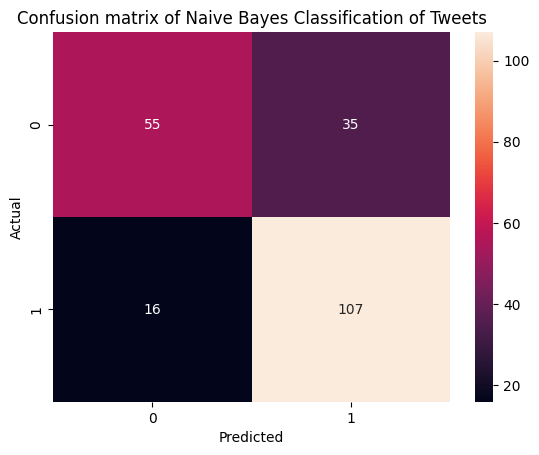

------------ Evaluation Metrics ----------------

F1 score: 0.808
Precision score: 0.754
Recall score: 0.870
Average precision-recall score: 0.731

Model: Naive Bayes Classification
Preprocessing Function:  stemmed_text



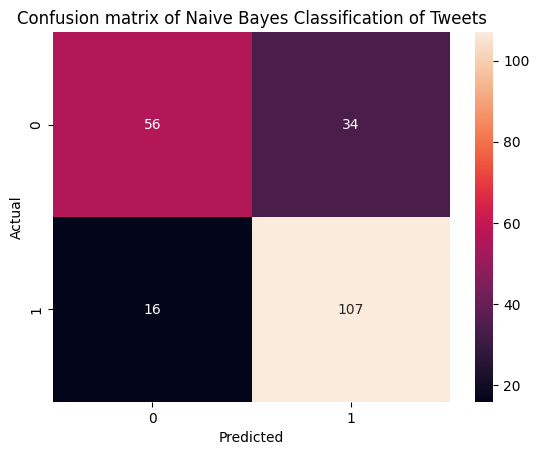

------------ Evaluation Metrics ----------------

F1 score: 0.811
Precision score: 0.759
Recall score: 0.870
Average precision-recall score: 0.735

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_stemmed_text



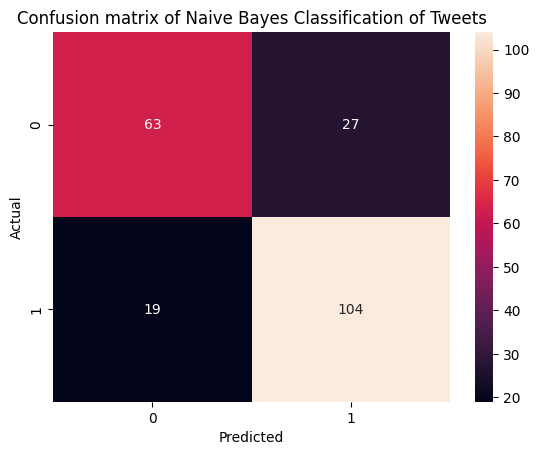

------------ Evaluation Metrics ----------------

F1 score: 0.819
Precision score: 0.794
Recall score: 0.846
Average precision-recall score: 0.760

Model: Naive Bayes Classification
Preprocessing Function:  lemmatized_text



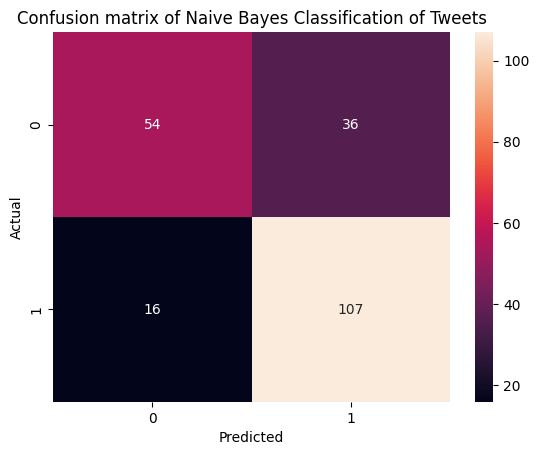

------------ Evaluation Metrics ----------------

F1 score: 0.805
Precision score: 0.748
Recall score: 0.870
Average precision-recall score: 0.726

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_lemmatized_text



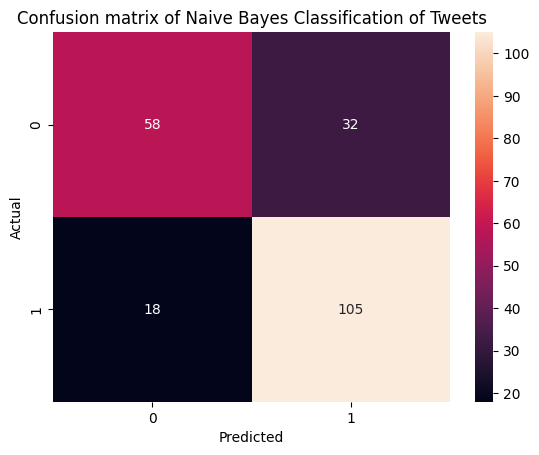

------------ Evaluation Metrics ----------------

F1 score: 0.808
Precision score: 0.766
Recall score: 0.854
Average precision-recall score: 0.739

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_text



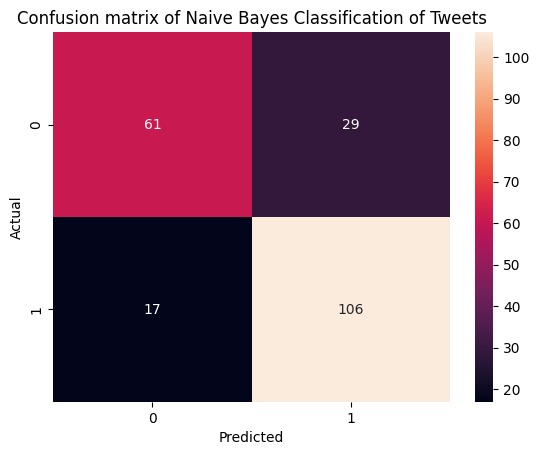

------------ Evaluation Metrics ----------------

F1 score: 0.822
Precision score: 0.785
Recall score: 0.862
Average precision-recall score: 0.756



In [23]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

preprocessings = ['Text', 'stemmed_text', 'cleaned_stemmed_text', 'lemmatized_text', 'cleaned_lemmatized_text', 'cleaned_text'] 
#Count Vectorizer
for preprocessing in preprocessings:
    x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                        df['Subjectivity'],
                                                        test_size = 0.2, 
                                                        random_state = 24)
    
    vectorizer = CountVectorizer(ngram_range=(1,2))
    tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
    test_vector = vectorizer.transform(x_test[preprocessing])
    
    naiveBayesClassification(x_train, x_test, y_train, y_test, preprocessing)
    time.sleep(2)

Model: Naive Bayes Classification
Preprocessing Function:  Text



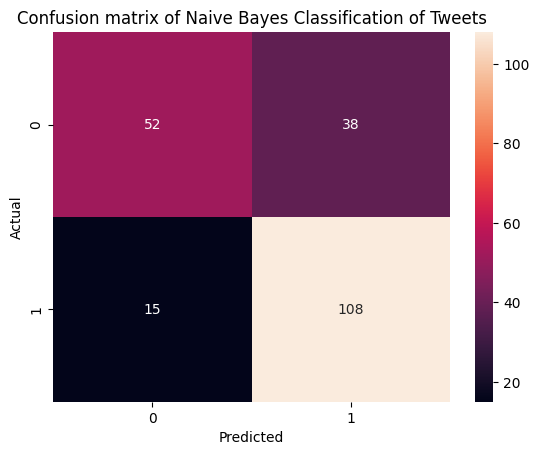

------------ Evaluation Metrics ----------------

F1 score: 0.803
Precision score: 0.740
Recall score: 0.878
Average precision-recall score: 0.720

Model: Naive Bayes Classification
Preprocessing Function:  stemmed_text



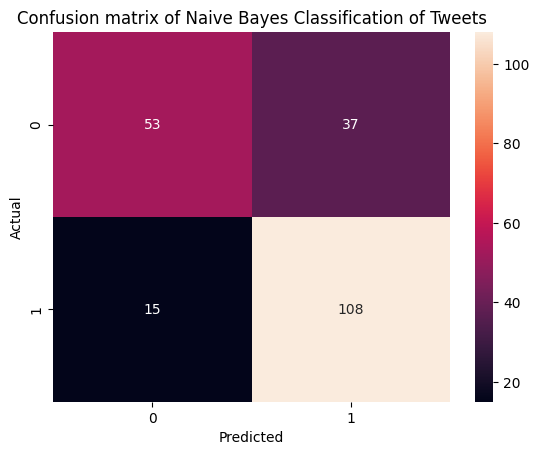

------------ Evaluation Metrics ----------------

F1 score: 0.806
Precision score: 0.745
Recall score: 0.878
Average precision-recall score: 0.724

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_stemmed_text



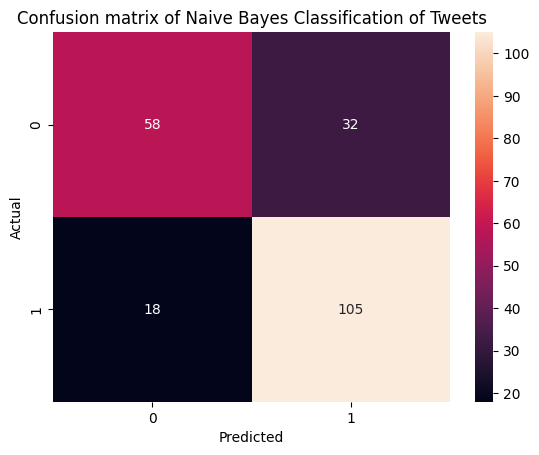

------------ Evaluation Metrics ----------------

F1 score: 0.808
Precision score: 0.766
Recall score: 0.854
Average precision-recall score: 0.739

Model: Naive Bayes Classification
Preprocessing Function:  lemmatized_text



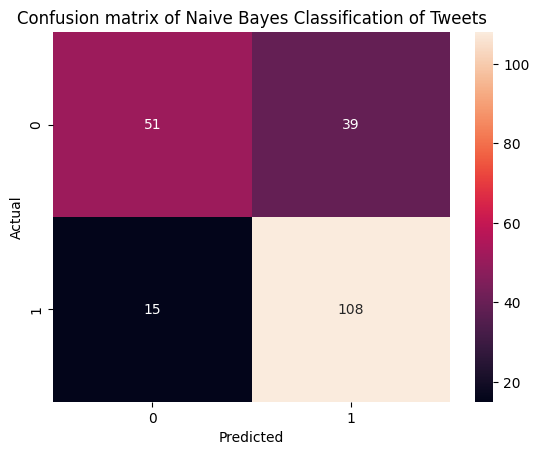

------------ Evaluation Metrics ----------------

F1 score: 0.800
Precision score: 0.735
Recall score: 0.878
Average precision-recall score: 0.716

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_lemmatized_text



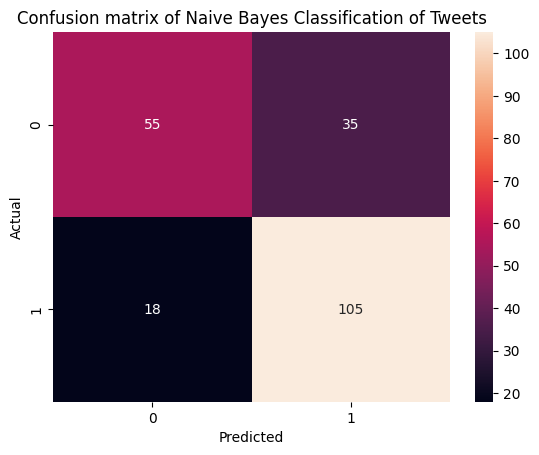

------------ Evaluation Metrics ----------------

F1 score: 0.798
Precision score: 0.750
Recall score: 0.854
Average precision-recall score: 0.725

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_text



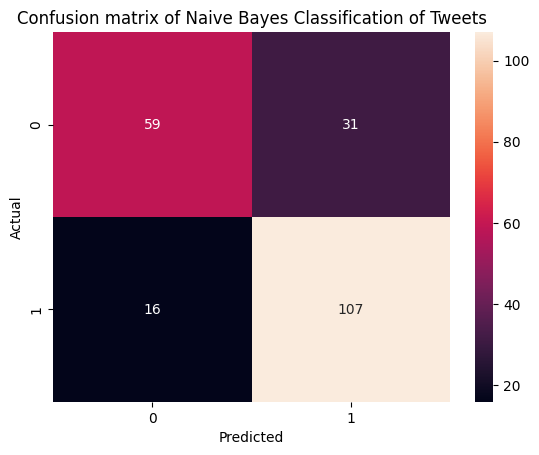

------------ Evaluation Metrics ----------------

F1 score: 0.820
Precision score: 0.775
Recall score: 0.870
Average precision-recall score: 0.750



In [24]:
#TF-IDF
for preprocessing in preprocessings:
    x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                        df['Subjectivity'],
                                                        test_size = 0.2, 
                                                        random_state = 24)
    
    vectorizer = TfidfVectorizer(use_idf = True, sublinear_tf = True)
    tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
    test_vector = vectorizer.transform(x_test[preprocessing])
    
    naiveBayesClassification(x_train, x_test, y_train, y_test, preprocessing)

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_text



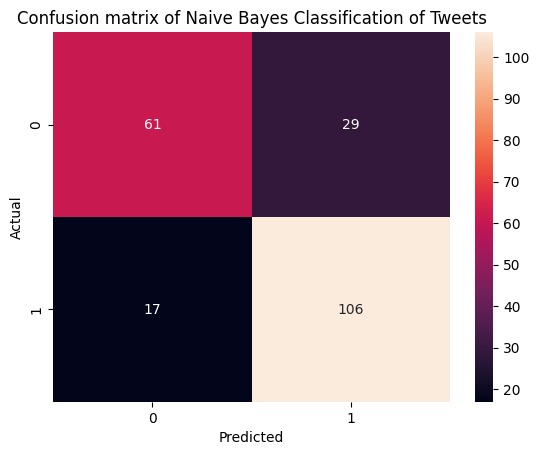

------------ Evaluation Metrics ----------------

F1 score: 0.822
Precision score: 0.785
Recall score: 0.862
Average precision-recall score: 0.756



In [25]:
# Best F1 score with cleaned_text & count vectorizer
preprocessing = 'cleaned_text'
x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                    df['Subjectivity'],
                                                    test_size = 0.2, 
                                                    random_state = 24)
    
vectorizer = CountVectorizer(ngram_range=(1,2))
tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
test_vector = vectorizer.transform(x_test[preprocessing])
    
naiveBayesClassification(x_train, x_test, y_train, y_test, preprocessing)

Model: K-Nearest Neighbour Classification
Best parameters: {'leaf_size': 1, 'metric': 'cosine', 'n_neighbors': 13, 'weights': 'distance'}
Preprocessing Function:  cleaned_text



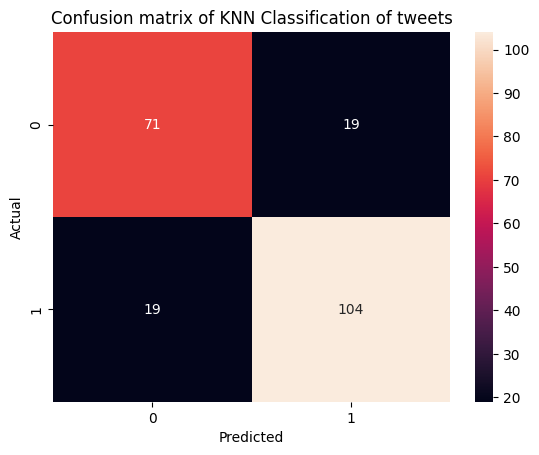

------------ Evaluation Metrics ----------------

F1 score: 0.846
Precision score: 0.846
Recall score: 0.846
Average precision-recall score: 0.804



In [26]:
KNNClassification(x_train, x_test, y_train, y_test, preprocessing)

Model: Support Vector Machine Classification
Preprocessing Function:  cleaned_text
Best parameters: {'C': 0.1, 'degree': 0, 'gamma': 0.05, 'kernel': 'linear'}



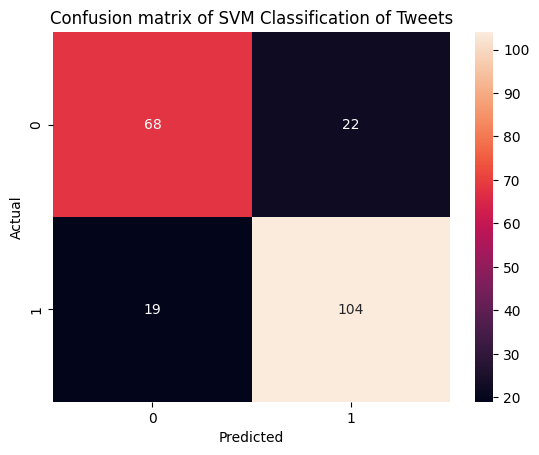

------------ Evaluation Metrics ----------------

F1 score: 0.835
Precision score: 0.825
Recall score: 0.846
Average precision-recall score: 0.787



In [27]:
SVMClassification(x_train, x_test, y_train, y_test, preprocessing)

Model: Decision Tree Classification
Preprocessing Function:  cleaned_text
Best parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'random'}



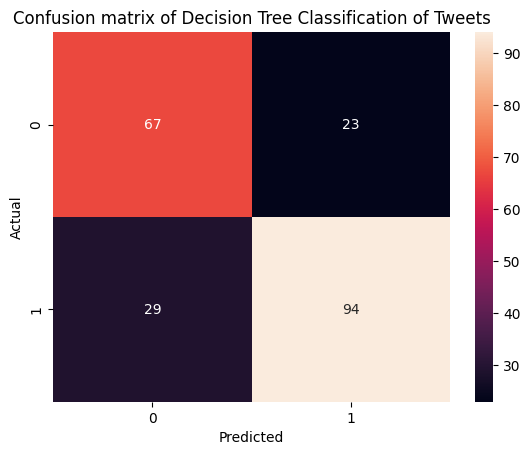

------------ Evaluation Metrics ----------------

F1 score: 0.783
Precision score: 0.803
Recall score: 0.764
Average precision-recall score: 0.750



In [28]:
decisionTreeClassification(x_train, x_test, y_train, y_test, preprocessing)

# Polarity Classification

In [29]:
df = df[df["Polarity"].notna()]
df.head()

,Text,Subjectivity,Polarity,stemmed_text,lemmatized_text,cleaned_text,cleaned_stemmed_text,cleaned_lemmatized_text
0,hey kingz crew i just went live on twitch come...,1.0,1.0,hey kingz crew i just went live on twitch come...,hey kingz crew i just went live on twitch come...,hey kingz crew went live twitch come chat hang...,hey kingz crew went live twitch come chat hang...,hey kingz crew went live twitch come chat hang...
2,tuesday night apex lets get some damage t co d...,1.0,1.0,tuesday night apex let get some damag t co dbt...,tuesday night apex let get some damage t co db...,tuesday night apex lets get damage co dbt givs...,tuesday night apex let get damag co dbt givsyr...,tuesday night apex let get damage co dbt givsy...
3,watch tohrmentgames go crazy on apex follow up...,1.0,1.0,watch tohrmentgam go crazi on apex follow up c...,watch tohrmentgames go crazy on apex follow up...,watch tohrmentgames go crazy apex follow carbo...,watch tohrmentgam go crazi apex follow carbong...,watch tohrmentgames go crazy apex follow carbo...
32,robot the candyghost mark yeah i ll just go to...,1.0,0.0,robot the candyghost mark yeah i ll just go to...,robot the candyghost mark yeah i ll just go to...,robot candyghost mark yeah go sleep keep fight...,robot candyghost mark yeah go sleep keep fight...,robot candyghost mark yeah go sleep keep fight...
35,in a game with competitive how does apexlegend...,1.0,0.0,in a game with competit how doe apexlegend cra...,in a game with competitive how doe apexlegends...,game competitive apexlegends crash much,game competit doe apexlegend crash much,game competitive doe apexlegends crash much


Model: Naive Bayes Classification
Preprocessing Function:  Text



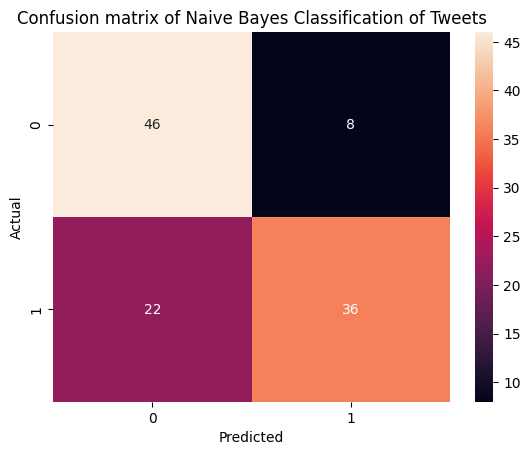

------------ Evaluation Metrics ----------------

F1 score: 0.706
Precision score: 0.818
Recall score: 0.621
Average precision-recall score: 0.704

Model: Naive Bayes Classification
Preprocessing Function:  stemmed_text



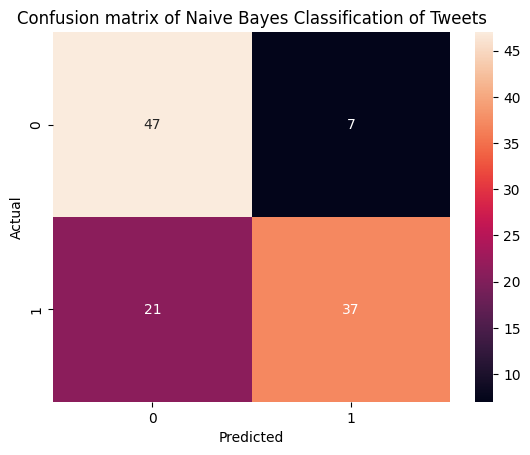

------------ Evaluation Metrics ----------------

F1 score: 0.725
Precision score: 0.841
Recall score: 0.638
Average precision-recall score: 0.724

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_stemmed_text



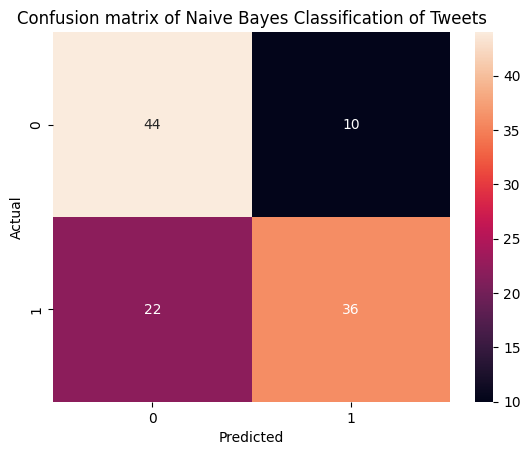

------------ Evaluation Metrics ----------------

F1 score: 0.692
Precision score: 0.783
Recall score: 0.621
Average precision-recall score: 0.682

Model: Naive Bayes Classification
Preprocessing Function:  lemmatized_text



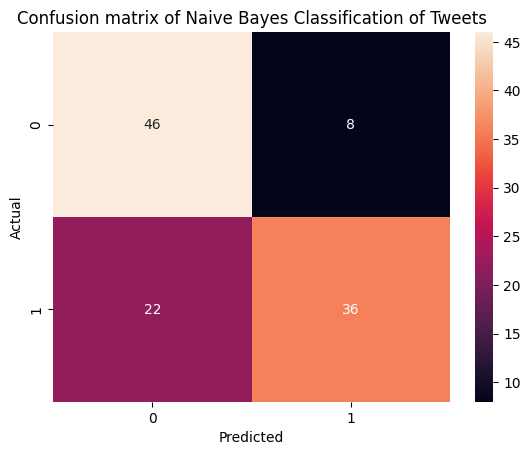

------------ Evaluation Metrics ----------------

F1 score: 0.706
Precision score: 0.818
Recall score: 0.621
Average precision-recall score: 0.704

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_lemmatized_text



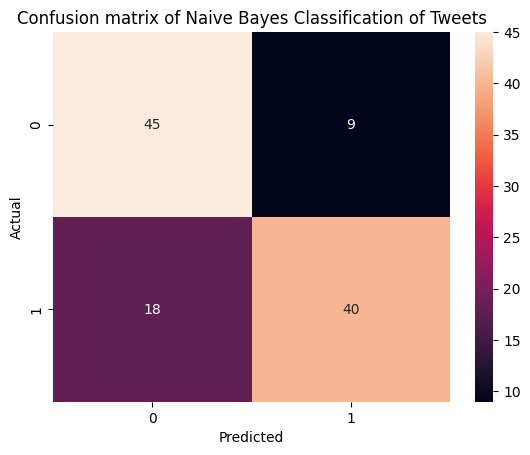

------------ Evaluation Metrics ----------------

F1 score: 0.748
Precision score: 0.816
Recall score: 0.690
Average precision-recall score: 0.724

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_text



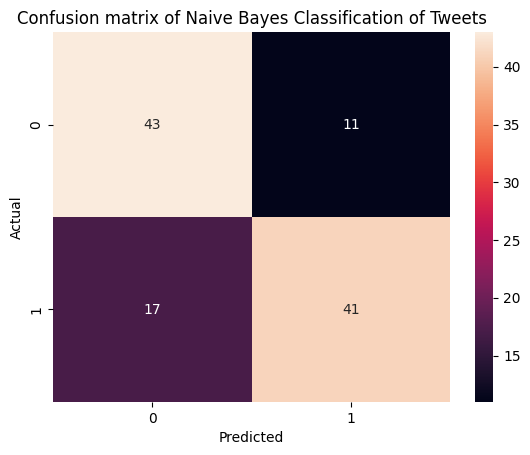

------------ Evaluation Metrics ----------------

F1 score: 0.745
Precision score: 0.788
Recall score: 0.707
Average precision-recall score: 0.709



In [34]:
preprocessings = ['Text', 'stemmed_text', 'cleaned_stemmed_text', 'lemmatized_text', 'cleaned_lemmatized_text', 'cleaned_text'] 
#Count Vectorizer
for preprocessing in preprocessings:
    x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                        df['Polarity'],
                                                        test_size = 0.2, 
                                                        random_state = 24)
    
    vectorizer = CountVectorizer(ngram_range=(1,2))
    tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
    test_vector = vectorizer.transform(x_test[preprocessing])
    
    naiveBayesClassification(x_train, x_test, y_train, y_test, preprocessing)
    time.sleep(2)

Model: Naive Bayes Classification
Preprocessing Function:  Text



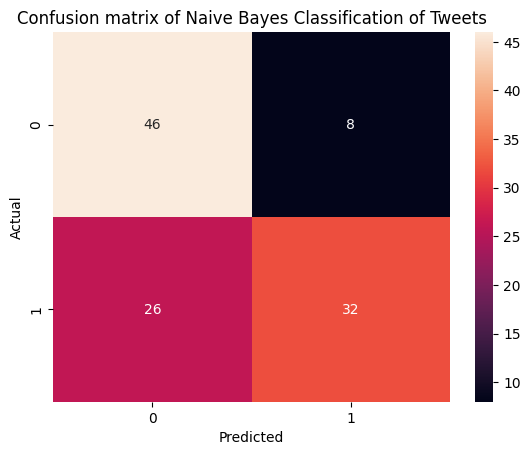

------------ Evaluation Metrics ----------------

F1 score: 0.653
Precision score: 0.800
Recall score: 0.552
Average precision-recall score: 0.674

Model: Naive Bayes Classification
Preprocessing Function:  stemmed_text



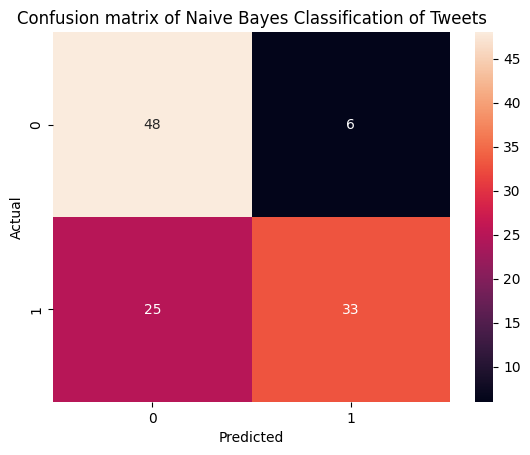

------------ Evaluation Metrics ----------------

F1 score: 0.680
Precision score: 0.846
Recall score: 0.569
Average precision-recall score: 0.705

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_stemmed_text



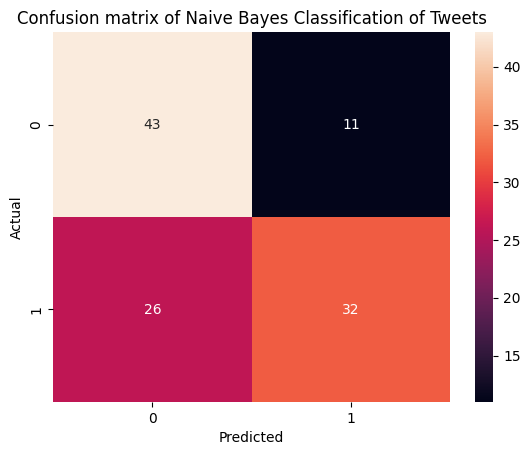

------------ Evaluation Metrics ----------------

F1 score: 0.634
Precision score: 0.744
Recall score: 0.552
Average precision-recall score: 0.643

Model: Naive Bayes Classification
Preprocessing Function:  lemmatized_text



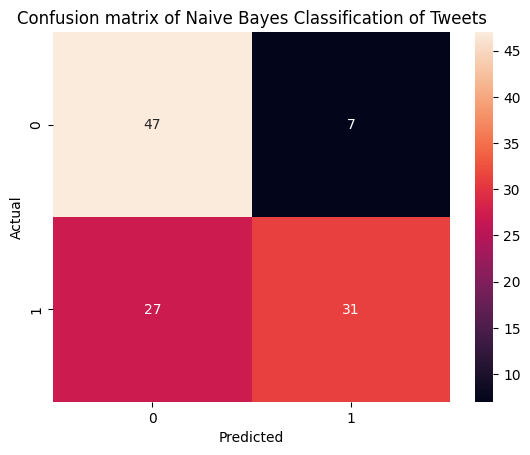

------------ Evaluation Metrics ----------------

F1 score: 0.646
Precision score: 0.816
Recall score: 0.534
Average precision-recall score: 0.677

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_lemmatized_text



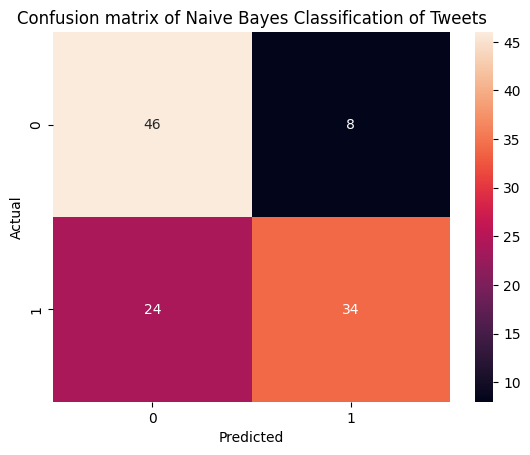

------------ Evaluation Metrics ----------------

F1 score: 0.680
Precision score: 0.810
Recall score: 0.586
Average precision-recall score: 0.689

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_text



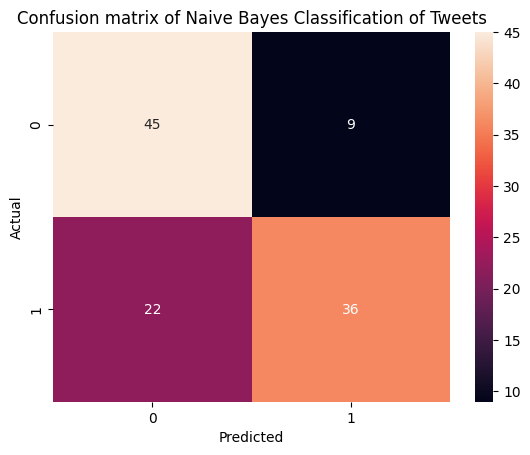

------------ Evaluation Metrics ----------------

F1 score: 0.699
Precision score: 0.800
Recall score: 0.621
Average precision-recall score: 0.693



In [31]:
#TF-IDF
for preprocessing in preprocessings:
    x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                        df['Polarity'],
                                                        test_size = 0.2, 
                                                        random_state = 24)
    
    vectorizer = TfidfVectorizer(use_idf = True, sublinear_tf = True)
    tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
    test_vector = vectorizer.transform(x_test[preprocessing])
    
    naiveBayesClassification(x_train, x_test, y_train, y_test, preprocessing)

In [35]:
# Best F1 score with cleaned_lemmatized_text & count vectorizer
preprocessing = 'cleaned_lemmatized_text'
x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                    df['Polarity'],
                                                    test_size = 0.2, 
                                                    random_state = 24)
    
vectorizer = CountVectorizer(ngram_range=(1,2))
tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
test_vector = vectorizer.transform(x_test[preprocessing])

Model: Naive Bayes Classification
Preprocessing Function:  cleaned_lemmatized_text



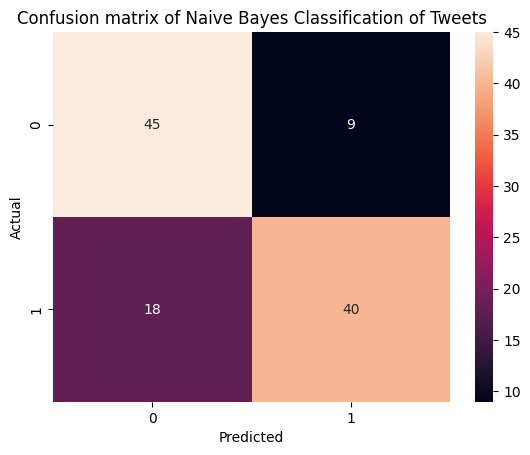

------------ Evaluation Metrics ----------------

F1 score: 0.748
Precision score: 0.816
Recall score: 0.690
Average precision-recall score: 0.724



In [36]:
naiveBayesClassification(x_train, x_test, y_train, y_test, preprocessing)

Model: K-Nearest Neighbour Classification
Best parameters: {'leaf_size': 1, 'metric': 'cosine', 'n_neighbors': 6, 'weights': 'distance'}
Preprocessing Function:  cleaned_lemmatized_text



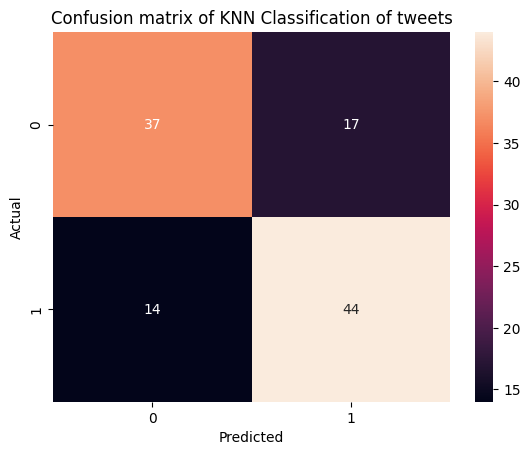

------------ Evaluation Metrics ----------------

F1 score: 0.739
Precision score: 0.721
Recall score: 0.759
Average precision-recall score: 0.672



In [37]:
KNNClassification(x_train, x_test, y_train, y_test, preprocessing)

Model: Support Vector Machine Classification
Preprocessing Function:  cleaned_lemmatized_text
Best parameters: {'C': 1, 'degree': 1, 'gamma': 0.15, 'kernel': 'poly'}



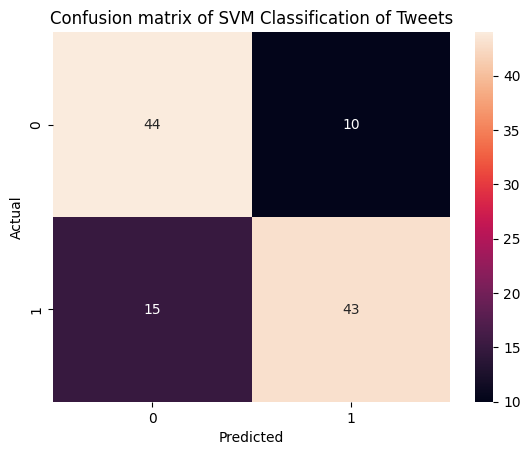

------------ Evaluation Metrics ----------------

F1 score: 0.775
Precision score: 0.811
Recall score: 0.741
Average precision-recall score: 0.735



In [38]:
SVMClassification(x_train, x_test, y_train, y_test, preprocessing)

Model: Decision Tree Classification
Preprocessing Function:  cleaned_lemmatized_text
Best parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}



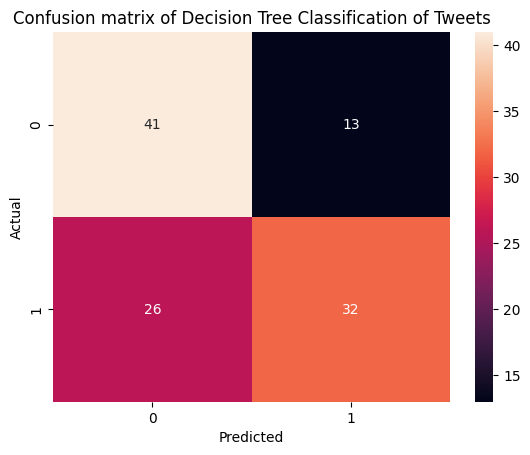

------------ Evaluation Metrics ----------------

F1 score: 0.621
Precision score: 0.711
Recall score: 0.552
Average precision-recall score: 0.624



In [39]:
decisionTreeClassification(x_train, x_test, y_train, y_test, preprocessing)